In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import pycountry
import warnings
import json, random
import IPython.display
from IPython.core.display import display, HTML, Javascript

In [4]:
public=pd.read_csv("survey_results_public.csv")

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
public.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [6]:
public['Employment'].value_counts()

Employed full-time                                      70495
Independent contractor, freelancer, or self-employed     9282
Not employed, but looking for work                       5805
Employed part-time                                       5380
Not employed, and not looking for work                   4132
Retired                                                   227
Name: Employment, dtype: int64

In [7]:
public=public[(public['Employment']=='Employed full-time') | (public['Employment']=='Independent contractor, freelancer, or self-employed')]

In [8]:
public.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy


In [9]:
public.shape

(79777, 129)

In [10]:
public['ConvertedSalary'].isna().sum()

36383

In [11]:
public = public.dropna(subset=['ConvertedSalary'])
public.isna().sum()

Respondent           0
Hobby                0
OpenSource           0
Country              0
Student            308
                 ...  
Age               2489
Dependents        3223
MilitaryUS       31719
SurveyTooLong     2251
SurveyEasy        2257
Length: 129, dtype: int64

In [12]:
public['HopeFiveYears'].unique()

array(["Working in a different or more specialized technical role than the one I'm in now",
       'Working as a founder or co-founder of my own company',
       'Doing the same work',
       'Working in a career completely unrelated to software development',
       'Working as a product manager or project manager',
       'Working as an engineering manager or other functional manager',
       nan, 'Retirement'], dtype=object)

In [13]:
public_data=public[['DevType','ConvertedSalary','YearsCodingProf']]

In [14]:
public_data=public_data.drop('DevType', axis=1).join(public_data['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

In [15]:
public_data['Type']=None
public_data.loc[(public_data.DevType=='Back-end developer')|(public_data.DevType=='Full-stack developer')|(public_data.DevType=='Front-end developer')|(public_data.DevType=='Mobile developer')|(public_data.DevType=='Desktop or enterprise applications developer')|(public_data.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
public_data.loc[(public_data.DevType=='Database administrator')|(public_data.DevType=='DevOps specialist')|(public_data.DevType=='System administrator'),'Type'] = 'Systems'
public_data.loc[(public_data.DevType=='Game or graphics developer')|(public_data.DevType=='Designer'),'Type'] = 'Design'
public_data.loc[(public_data.DevType=='Student')|(public_data.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
public_data.loc[(public_data.DevType=='Data scientist or machine learning specialist')|(public_data.DevType=='Data or business analyst'),'Type'] = 'DataScience'
public_data.loc[(public_data.DevType=='QA or test developer'),'Type'] = 'Testing'
public_data.loc[(public_data.DevType=='Marketing or sales professional')|(public_data.DevType=='C-suite executive (CEO, CTO, etc.)')|(public_data.DevType=='Product manager')|(public_data.DevType=='Engineering manager'),'Type'] = 'Management'
public_data

,ConvertedSalary,YearsCodingProf,DevType,Type
1,70841.0,18-20 years,Database administrator,Systems
1,70841.0,18-20 years,DevOps specialist,Systems
1,70841.0,18-20 years,Full-stack developer,Technical
1,70841.0,18-20 years,System administrator,Systems
4,21426.0,0-2 years,Data or business analyst,DataScience
...,...,...,...,...
89839,96000.0,NaN,Back-end developer,Technical
89839,96000.0,NaN,Student,Misc
89888,800.0,NaN,Designer,Design
89888,800.0,NaN,Student,Misc


In [16]:
public_data = public_data.dropna(subset=['YearsCodingProf','Type'])

In [17]:
public_data['YearsCodingProf'].value_counts()
public_data.loc[(public_data.YearsCodingProf=='0-2 years')|(public_data.YearsCodingProf=='3-5 years'),'Level'] = 'Primary'
public_data.loc[(public_data.YearsCodingProf=='6-8 years')|(public_data.YearsCodingProf=='9-11 years')|(public_data.YearsCodingProf=='12-14 years'),'Level'] = 'Intermediate'

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
public_data['Level'].fillna('Advanced',inplace=True)
public_data

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ConvertedSalary,YearsCodingProf,DevType,Type,Level
1,70841.0,18-20 years,Database administrator,Systems,Advanced
1,70841.0,18-20 years,DevOps specialist,Systems,Advanced
1,70841.0,18-20 years,Full-stack developer,Technical,Advanced
1,70841.0,18-20 years,System administrator,Systems,Advanced
4,21426.0,0-2 years,Data or business analyst,DataScience,Primary
...,...,...,...,...,...
85353,1272.0,0-2 years,Student,Misc,Primary
86338,15972.0,6-8 years,Back-end developer,Technical,Intermediate
86338,15972.0,6-8 years,Full-stack developer,Technical,Intermediate
87199,97910.0,12-14 years,Front-end developer,Technical,Intermediate


In [19]:
public_data.Type.unique()

array(['Systems', 'Technical', 'DataScience', 'Design', 'Testing', 'Misc',
       'Management'], dtype=object)

In [20]:
dic_level={}
for i in public_data.Type.unique():
    labels=[]
    data=public_data[public_data['Type']==i]
    for j in ['Primary','Intermediate','Advanced']:
        data_level=data[data['Level']==j]
        labels.append(len(data_level))
    dic_level[i]=labels
print(dic_level)

{'Systems': [6991, 7055, 3470], 'Technical': [40487, 31387, 13923], 'DataScience': [3522, 2250, 1258], 'Design': [3131, 2014, 1134], 'Testing': [1776, 1053, 475], 'Misc': [2420, 733, 273], 'Management': [1802, 3056, 2066]}


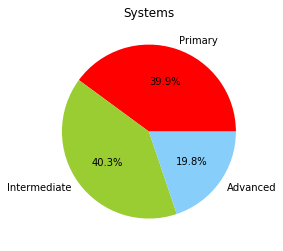

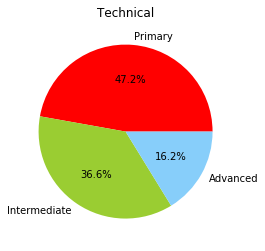

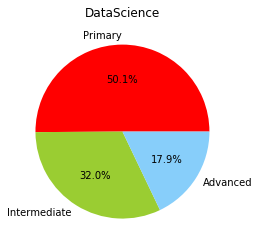

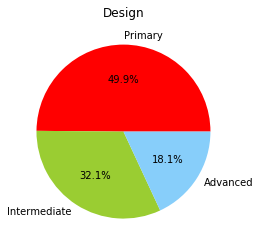

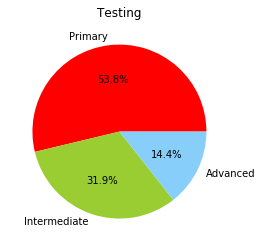

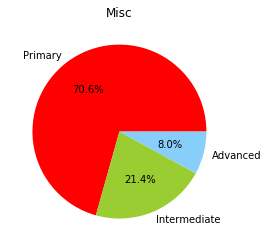

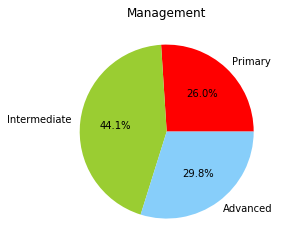

In [21]:
colors = ['red','yellowgreen','lightskyblue']
labels=['Primary','Intermediate','Advanced']
for i in dic_level.keys():
    plt.pie(dic_level[i],labels=labels,colors=colors, autopct='%1.1f%%')
    plt.title(i)
    plt.show()

In [22]:
public_data_management=public_data[public_data['Type']=='Management']
public_data_management.groupby(['DevType','Level']).median()

ConvertedSalary
DevType                            Level                        
C-suite executive (CEO, CTO, etc.) Advanced             108000.0
                                   Intermediate          69452.0
                                   Primary               30000.0
Engineering manager                Advanced             122388.0
                                   Intermediate          87985.5
                                   Primary               48000.0
Marketing or sales professional    Advanced             116679.0
                                   Intermediate          64417.0
                                   Primary               30597.0
Product manager                    Advanced             102318.0
                                   Intermediate          65000.0
                                   Primary               45000.0

## India

In [23]:
India = public[public['Country']=='India']
print(India)

       Respondent Hobby OpenSource Country         Student  \
24             39   Yes         No   India              No   
41             61   Yes         No   India              No   
45             71   Yes         No   India              No   
93            137   Yes        Yes   India              No   
95            140   Yes         No   India              No   
...           ...   ...        ...     ...             ...   
87652       13688    No         No   India  Yes, full-time   
87681       14783   Yes         No   India              No   
87706       15637   Yes        Yes   India  Yes, part-time   
89634       88706   Yes         No   India  Yes, part-time   
89888       98064   Yes        Yes   India  Yes, full-time   

                                              Employment  \
24                                    Employed full-time   
41                                    Employed full-time   
45                                    Employed full-time   
93             

In [24]:
India_data=India[['Country','FormalEducation','OpenSource','DevType','YearsCodingProf','LanguageWorkedWith','ConvertedSalary']]

In [25]:
print(India_data.shape)

(3760, 7)


In [26]:
India_data.head()

,Country,FormalEducation,OpenSource,DevType,YearsCodingProf,LanguageWorkedWith,ConvertedSalary
24,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,Mobile developer,3-5 years,C;C++;Java;JavaScript;SQL;Swift;Kotlin,10958.0
41,India,Some college/university study without earning ...,No,Designer;Front-end developer,0-2 years,PHP;HTML;CSS,123984.0
45,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,Back-end developer;Desktop or enterprise appli...,3-5 years,JavaScript;PHP;Python;SQL;HTML;CSS,6576.0
93,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Yes,Engineering manager;Mobile developer,6-8 years,Objective-C;Swift,34440.0
95,India,"Bachelor’s degree (BA, BS, B.Eng., etc.)",No,Back-end developer,0-2 years,Java;JavaScript;SQL,4128.0


### Group ConvertedSalary

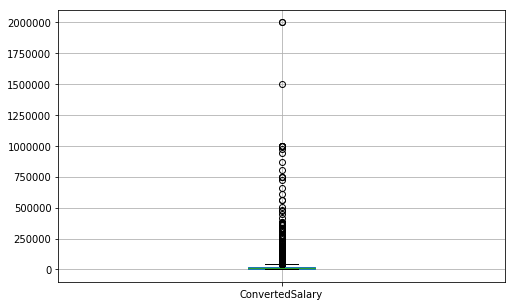

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
India_data.boxplot(column='ConvertedSalary', ax=ax)
plt.show()

In [28]:
s=India_data['ConvertedSalary']
print(s.describe())

count    3.760000e+03
mean     2.871700e+04
std      8.849200e+04
min      0.000000e+00
25%      5.322000e+03
50%      1.014200e+04
75%      2.079225e+04
max      2.000000e+06
Name: ConvertedSalary, dtype: float64


In [29]:
India_data_copy=India_data.copy()
India_data_copy.loc[:, 'isOutlier'] = (s < s.quantile(0.25))|(s > s.quantile(0.75))
India_data = India_data_copy[India_data_copy['isOutlier'] != True]
print(India_data['ConvertedSalary'].describe())

count     1881.000000
mean     10969.518341
std       4245.315710
min       5322.000000
25%       7483.000000
50%      10140.000000
75%      14089.000000
max      20711.000000
Name: ConvertedSalary, dtype: float64


In [30]:
India_data['SalaryType']=None
India_data.loc[India_data.ConvertedSalary<=7400,'SalaryType'] = 'Low'
India_data.loc[India_data.ConvertedSalary>=13000,'SalaryType'] = 'High'
India_data.loc[(India_data.ConvertedSalary<=13000) & (India_data.ConvertedSalary>7400),'SalaryType'] = 'Medium'

#India_data['SalaryType'].head
India_data.shape

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(1881, 9)

### Sunburst for DevType

In [31]:
India_data_DevType = India_data
print(India_data_DevType.dtypes)
India_data_DevType = India_data_DevType.dropna(subset=['DevType'])
# DevType=India_data_DevType['DevType']
#India_data_DevType['DevType'].dropna()
# DevType.astype(str)
India_data_DevType['DevType'].astype(str)
print(India_data_DevType['DevType'].dtypes)

Country                object
FormalEducation        object
OpenSource             object
DevType                object
YearsCodingProf        object
LanguageWorkedWith     object
ConvertedSalary       float64
isOutlier                bool
SalaryType             object
dtype: object
object


In [32]:
def helper(string):
    word=string.split(";")
    return word

In [33]:
from collections import Counter
words=[]
word=India_data_DevType['DevType'].apply(helper)
print(word.shape)
for i in word:
    words.append(i)
from itertools import chain
words_flat=list(chain.from_iterable(words))
dic_DevType=Counter(words_flat)
print(dic_DevType)

(1872,)
Counter({'Back-end developer': 1102, 'Full-stack developer': 941, 'Front-end developer': 715, 'Mobile developer': 567, 'Designer': 208, 'Desktop or enterprise applications developer': 201, 'Database administrator': 197, 'DevOps specialist': 140, 'Data or business analyst': 108, 'QA or test developer': 108, 'Data scientist or machine learning specialist': 107, 'System administrator': 98, 'Product manager': 82, 'Student': 59, 'Engineering manager': 57, 'Embedded applications or devices developer': 43, 'Educator or academic researcher': 38, 'Game or graphics developer': 30, 'C-suite executive (CEO, CTO, etc.)': 26, 'Marketing or sales professional': 11})


In [34]:
India_data_DevType.head()

,Country,FormalEducation,OpenSource,DevType,YearsCodingProf,LanguageWorkedWith,ConvertedSalary,isOutlier,SalaryType
24,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,Mobile developer,3-5 years,C;C++;Java;JavaScript;SQL;Swift;Kotlin,10958.0,False,Medium
45,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,Back-end developer;Desktop or enterprise appli...,3-5 years,JavaScript;PHP;Python;SQL;HTML;CSS,6576.0,False,Low
123,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Yes,Mobile developer,3-5 years,Java,9768.0,False,Medium
149,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Yes,Back-end developer;Front-end developer;Full-st...,3-5 years,JavaScript;PHP;SQL;TypeScript;HTML;CSS,7512.0,False,Medium
215,India,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Front-end developer;Full-stack developer,3-5 years,JavaScript;Kotlin,18780.0,False,High


In [35]:
India_data_DevType=India_data_DevType.drop('DevType', axis=1).join(India_data_DevType['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

In [36]:
India_data_DevType['Type']=None
India_data_DevType.loc[(India_data_DevType.DevType=='Back-end developer')|(India_data_DevType.DevType=='Full-stack developer')|(India_data_DevType.DevType=='Front-end developer')|(India_data_DevType.DevType=='Mobile developer')|(India_data_DevType.DevType=='Desktop or enterprise applications developer')|(India_data_DevType.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
India_data_DevType.loc[(India_data_DevType.DevType=='Database administrator')|(India_data_DevType.DevType=='DevOps specialist')|(India_data_DevType.DevType=='System administrator'),'Type'] = 'Systems'
India_data_DevType.loc[(India_data_DevType.DevType=='Game or graphics developer')|(India_data_DevType.DevType=='Designer'),'Type'] = 'Design'
India_data_DevType.loc[(India_data_DevType.DevType=='Student')|(India_data_DevType.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
India_data_DevType.loc[(India_data_DevType.DevType=='Data scientist or machine learning specialist')|(India_data_DevType.DevType=='Data or business analyst'),'Type'] = 'DataScience'
India_data_DevType.loc[(India_data_DevType.DevType=='QA or test developer'),'Type'] = 'Testing'
India_data_DevType.loc[(India_data_DevType.DevType=='Marketing or sales professional')|(India_data_DevType.DevType=='C-suite executive (CEO, CTO, etc.)')|(India_data_DevType.DevType=='Product manager')|(India_data_DevType.DevType=='Engineering manager'),'Type'] = 'Management'
India_data_DevType

,Country,FormalEducation,OpenSource,YearsCodingProf,LanguageWorkedWith,ConvertedSalary,isOutlier,SalaryType,DevType,Type
24,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,3-5 years,C;C++;Java;JavaScript;SQL;Swift;Kotlin,10958.0,False,Medium,Mobile developer,Technical
45,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,3-5 years,JavaScript;PHP;Python;SQL;HTML;CSS,6576.0,False,Low,Back-end developer,Technical
45,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,3-5 years,JavaScript;PHP;Python;SQL;HTML;CSS,6576.0,False,Low,Desktop or enterprise applications developer,Technical
45,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,3-5 years,JavaScript;PHP;Python;SQL;HTML;CSS,6576.0,False,Low,Front-end developer,Technical
45,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,3-5 years,JavaScript;PHP;Python;SQL;HTML;CSS,6576.0,False,Low,Full-stack developer,Technical
...,...,...,...,...,...,...,...,...,...,...
84249,India,Primary/elementary school,No,0-2 years,JavaScript;Python;HTML;CSS,11268.0,False,Medium,Front-end developer,Technical
84249,India,Primary/elementary school,No,0-2 years,JavaScript;Python;HTML;CSS,11268.0,False,Medium,Student,Misc
86338,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Yes,6-8 years,JavaScript;PHP;HTML;CSS,15972.0,False,High,Back-end developer,Technical
86338,India,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Yes,6-8 years,JavaScript;PHP;HTML;CSS,15972.0,False,High,Full-stack developer,Technical


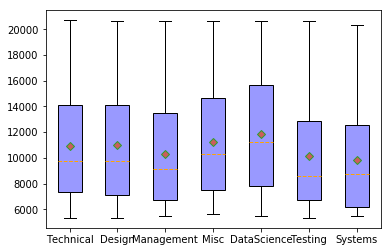

In [37]:
Types = []
devtypes = India_data_DevType.Type.unique()
for devtype in devtypes:
    Types.append(India_data_DevType.loc[India_data_DevType.Type==devtype,'ConvertedSalary'])

# 绘图
plt.boxplot(x = Types, 
            patch_artist=True,
            labels = ['Technical','Design','Management','Misc','DataScience','Testing','Systems'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

# 显示图形
plt.show()

In [38]:
India_dev=India_data_DevType.groupby('Type')

In [39]:
India_data_DevType.groupby(['Type','SalaryType']).median()

ConvertedSalary  isOutlier
Type        SalaryType                            
DataScience High                15654.0      False
            Low                  6309.0      False
            Medium               9552.0      False
Design      High                15654.0      False
            Low                  6108.0      False
            Medium               9393.0      False
Management  High                17220.0      False
            Low                  6204.0      False
            Medium               9396.0      False
Misc        High                17220.0      False
            Low                  5870.0      False
            Medium               9396.0      False
Systems     High                15654.0      False
            Low                  6058.5      False
            Medium               9396.0      False
Technical   High                15654.0      False
            Low                  6262.0      False
            Medium               9396.0      False
Testing     High                17063.0      False
            Low                  6262.0      False
            Medium               9393.0      False

In [40]:
def helper_type(df):
    types=[]
    for i in df:
        types.append(i)
    count=Counter(types)
    return count

In [41]:
India_dev_technical=India_dev.get_group('Technical') 
India_dev_design=India_dev.get_group('Design') 
India_dev_systems=India_dev.get_group('Systems')
India_dev_datascience=India_dev.get_group('DataScience') 
India_dev_management=India_dev.get_group('Management') 
India_dev_testing=India_dev.get_group('Testing')
India_dev_misc=India_dev.get_group('Misc')
print(len(India_dev_technical))
print(len(India_dev_design))
print(len(India_dev_systems))
print(len(India_dev_datascience))
print(len(India_dev_management))
print(len(India_dev_testing))
print(len(India_dev_misc))

3569
238
435
215
176
108
97


In [42]:
count_technical=India_dev_technical.apply(helper_type)
print(count_technical['SalaryType'])
count_design=India_dev_design.apply(helper_type)
print(count_design['SalaryType'])
count_systems=India_dev_systems.apply(helper_type)
print(count_systems['SalaryType'])
count_datascience=India_dev_datascience.apply(helper_type)
print(count_datascience['SalaryType'])
count_management=India_dev_management.apply(helper_type)
print(count_management['SalaryType'])
count_testing=India_dev_testing.apply(helper_type)
print(count_testing['SalaryType'])
count_misc=India_dev_misc.apply(helper_type)
print(count_misc['SalaryType'])

Counter({'Medium': 1555, 'High': 1112, 'Low': 902})
Counter({'Medium': 98, 'Low': 74, 'High': 66})
Counter({'Medium': 174, 'High': 143, 'Low': 118})
Counter({'Medium': 97, 'High': 72, 'Low': 46})
Counter({'High': 71, 'Medium': 68, 'Low': 37})
Counter({'Medium': 42, 'Low': 39, 'High': 27})
Counter({'Low': 38, 'Medium': 38, 'High': 21})


In [43]:
India_salary=India_data_DevType.groupby('SalaryType')

In [44]:
India_salary_high=India_salary.get_group('High') 
India_salary_low=India_salary.get_group('Low') 
India_salary_medium=India_salary.get_group('Medium')
print(len(India_salary_high))
print(len(India_salary_low))
print(len(India_salary_medium))

1512
1254
2072


In [45]:
count_high=India_salary_high.apply(helper_type)
print(count_high['DevType'])
count_low=India_salary_low.apply(helper_type)
print(count_low['DevType'])
count_medium=India_salary_medium.apply(helper_type)
print(count_medium['DevType'])

Counter({'Back-end developer': 341, 'Full-stack developer': 300, 'Front-end developer': 217, 'Mobile developer': 169, 'Desktop or enterprise applications developer': 70, 'Database administrator': 56, 'Designer': 55, 'DevOps specialist': 51, 'Data scientist or machine learning specialist': 41, 'System administrator': 36, 'Product manager': 32, 'Data or business analyst': 31, 'QA or test developer': 27, 'Engineering manager': 24, 'Embedded applications or devices developer': 15, 'C-suite executive (CEO, CTO, etc.)': 13, 'Educator or academic researcher': 11, 'Game or graphics developer': 11, 'Student': 10, 'Marketing or sales professional': 2})
Counter({'Back-end developer': 269, 'Full-stack developer': 217, 'Front-end developer': 193, 'Mobile developer': 162, 'Designer': 63, 'Database administrator': 60, 'Desktop or enterprise applications developer': 50, 'QA or test developer': 39, 'Data or business analyst': 29, 'DevOps specialist': 29, 'System administrator': 29, 'Student': 26, 'Prod

In [46]:
def helper_typecount(dic):
    count={'Technical':0,'Systems':0,'Design':0,'Misc':0,'DataScience':0,'Testing':0,'Management':0}
    for i in dic.keys():
        if i in ['Back-end developer','Full-stack developer','Front-end developer','Mobile developer','Desktop or enterprise applications developer','Embedded applications or devices developer']:
            count['Technical']+=dic[i]
        elif i in ['Database administrator','DevOps specialist','System administrator']:
            count['Systems']+=dic[i]
        elif i in ['Game or graphics developer','Designer']:
            count['Design']+=dic[i]
        elif i in ['Student','Educator or academic researcher']:
            count['Misc']+=dic[i]
        elif i in ['Data scientist or machine learning specialist','Data or business analyst']:
            count['DataScience']+=dic[i]
        elif i in ['QA or test developer']:
            count['Testing']+=dic[i]
        elif i in ['Marketing or sales professional','C-suite executive (CEO, CTO, etc.)','Product manager','Engineering manager']:
            count['Management']+=dic[i]
    return count
        

In [47]:
high_count=helper_typecount(count_high['DevType'])
print(high_count)
low_count=helper_typecount(count_low['DevType'])
print(low_count)
medium_count=helper_typecount(count_medium['DevType'])
print(medium_count)

{'Technical': 1112, 'Systems': 143, 'Design': 66, 'Misc': 21, 'DataScience': 72, 'Testing': 27, 'Management': 71}
{'Technical': 902, 'Systems': 118, 'Design': 74, 'Misc': 38, 'DataScience': 46, 'Testing': 39, 'Management': 37}
{'Technical': 1555, 'Systems': 174, 'Design': 98, 'Misc': 38, 'DataScience': 97, 'Testing': 42, 'Management': 68}


In [48]:
# India_DevType=India_data_DevType.groupby('DevType')
# India_DevType

In [49]:
html5="""<!DOCTYPE html>
<html>
  <head>
  <style>
#main {
  float: left;
  width: 750px;
}

#sidebar {
  float: right;
  width: 100px;
}

#sequence {
  width: 600px;
  height: 70px;
}

#legend {
  padding: 10px 0 0 3px;
}

#sequence text, #legend text {
  font-weight: 600;
  fill: #fff;
}

#chart {
  position: relative;
}

#chart path {
  stroke: #fff;
}

#explanation {
  position: absolute;
  top: 330px;
  left: 405px;
  width: 120px;
  text-align: center;
  color: #666;
  z-index: -1;
}

#percentage {
  font-size: 2.5em;
}</style>
    <meta charset="utf-8">
    <title>Sequences sunburst</title>
  </head>
  <body>
    <div id="main">
      <div id="sequence"></div>
      <svg id="chart">
        <div id="explanation" style="visibility: hidden;">
          <span id="percentage"></span><br/>
          Respondents
        </div>
      </svg>
    </div>
  </body>
</html>"""

# vis = """DevTypes-Technical-Backend,1675
# DevTypes-Technical-Fullstack,1415
# DevTypes-Technical-Frontend,1028
# DevTypes-Technical-Mobile,800
# DevTypes-Technical-Applications,389
# DevTypes-Technical-EmbeddedApps,292
# DevTypes-Systems-Database,280
# DevTypes-Design-Designer,292
# DevTypes-Misc-Srudent,74
# DevTypes-Systems-SystemAdmin,143
# DevTypes-Systems-DevOps,259
# DevTypes-DataScience-Analyst,179
# DevTypes-DataScience-DataScientist,187
# DevTypes-Testing-QA,156
# DevTypes-Management-Engineering,157
# DevTypes-Design-Graphics,42
# DevTypes-Management-Product,142
# DevTypes-Misc-Researcher,55
# DevTypes-Management-Csuite,75
# DevTypes-Management-MarketingSales,19"""


# vis = """DevTypes-High-Technical,4061
# DevTypes-High-Systems,893
# DevTypes-High-Design,377
# DevTypes-High-Misc,101
# DevTypes-High-DataScience,440
# DevTypes-High-Management,734
# DevTypes-High-Testing,136

# DevTypes-Low-Technical,6508
# DevTypes-Low-Systems,1247
# DevTypes-Low-Design,768
# DevTypes-Low-Misc,350
# DevTypes-Low-Systems,1247
# DevTypes-Low-DataScience,428
# DevTypes-Low-Management,544
# DevTypes-Low-Testing,328

# DevTypes-Medium-Technical,7923
# DevTypes-Medium-Systems,1548
# DevTypes-Medium-Design,588
# DevTypes-Medium-Misc,269
# DevTypes-Medium-Systems,1548
# DevTypes-Medium-DataScience,662
# DevTypes-Medium-Management,920
# DevTypes-Medium-Testing,266"""

vis="""DevTypes-Technical-High,1112
DevTypes-Technical-Low,902
DevTypes-Technical-Medium,1555

DevTypes-Design-High,66
DevTypes-Design-Low,74
DevTypes-Design-Medium,98

DevTypes-Systems-High,143
DevTypes-Systems-Low,174
DevTypes-Systems-Medium,118

DevTypes-DataScience-High,72
DevTypes-DataScience-Low,97
DevTypes-DataScience-Medium,46

DevTypes-Management-High,71
DevTypes-Management-Low,37
DevTypes-Management-Medium,68

DevTypes-Testing-High,27
DevTypes-Testing-Low,39
DevTypes-Testing-Medium,42

DevTypes-Misc-High,21
DevTypes-Misc-Low,38
DevTypes-Misc-Medium,38"""
fout = open("visit-sequences.csv","w")
fout.write(vis)

560

In [50]:
js5 = """
require(["d3"], function(d3) {// Dimensions of sunburst. reduce to lower dimensions  
var width = 750;
var height = 600;
var radius = Math.min(width, height) / 2;

// Breadcrumb dimensions: width, height, spacing, width of tip/tail.
var b = {
  w: 150, h: 30, s: 3, t: 10
};

// Mapping of step names to colors.
// Mapping of step names to colors. manually created this 
var colors = {
  "DevTypes" : "#bc99c6",
  "Technical":"#f4c542",
  "Misc": "#5687d1",
  "Design": "#7b615c",
  "Management": "#de783b",
  "Testing": "#6ab975",
  "DataScience": "#a173d1",
  "Systems": "#bbbbb",

  "Backend":"#ef4078",
  "Fullstack": "#5687d1",
  "Frontend": "#7b615c",
  "Mobile": "#de783b",
  "Applications": "#6ab975",
  "EmbeddedApps": "#a173d1",
  "Student": "#bbbbb",

  "Database":"#f4c542",
  "Designer": "#5687d1",
  "SystemAdmin": "#7b615c",
  "DevOps": "#de783b",
  "Analyst": "#6ab975",
  "QA": "#a173d1",
  "DataScientist": "#bbbbb",

  "Engineering":"#f4c542",
  "Product": "#5687d1",
  "Graphics": "#7b615c",
  "Researcher": "#de783b",
  "Analyst": "#6ab975",
  "Csuite": "#a173d1",
  "MarketingSales": "#bbbbb",
  
  "High":"#f4c542",
  "Low": "#5687d1",
  "Medium": "#7b615c",
    
};

// Total size of all segments; we set this later, after loading the data.
var totalSize = 0; 

var vis = d3.select("#chart")
    .attr("width", width)
    .attr("height", height)
    .append("svg:g")
    .attr("id", "container")
    .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")");

var partition = d3.partition()
    .size([2 * Math.PI, radius * radius]);

var arc = d3.arc()
    .startAngle(function(d) { return d.x0; })
    .endAngle(function(d) { return d.x1; })
    .innerRadius(function(d) { return Math.sqrt(d.y0); })
    .outerRadius(function(d) { return Math.sqrt(d.y1); });

d3.text("visit-sequences.csv", function(text) {
  var csv = d3.csvParseRows(text);
  var json = buildHierarchy(csv);
  createVisualization(json);
});

// Main function to draw and set up the visualization, once we have the data.
function createVisualization(json) {

  // Basic setup of page elements.
  initializeBreadcrumbTrail();
  //drawLegend();
  //d3.select("#togglelegend").on("click", toggleLegend);

  // Bounding circle underneath the sunburst, to make it easier to detect
  // when the mouse leaves the parent g.
  vis.append("svg:circle")
      .attr("r", radius)
      .style("opacity", 0);

  // Turn the data into a d3 hierarchy and calculate the sums.
  var root = d3.hierarchy(json)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });
  
  // For efficiency, filter nodes to keep only those large enough to see.
  var nodes = partition(root).descendants()
      .filter(function(d) {
          return (d.x1 - d.x0 > 0.005); // 0.005 radians = 0.29 degrees
      });

  var path = vis.data([json]).selectAll("path")
      .data(nodes)
      .enter().append("svg:path")
      .attr("display", function(d) { return d.depth ? null : "none"; })
      .attr("d", arc)
      .attr("fill-rule", "evenodd")
      .style("fill", function(d) { return colors[d.data.name]; })
      .style("opacity", 1)
      .on("mouseover", mouseover);

  // Add the mouseleave handler to the bounding circle.
  d3.select("#container").on("mouseleave", mouseleave);

  // Get total size of the tree = value of root node from partition.
  totalSize = path.datum().value;
 };

// Fade all but the current sequence, and show it in the breadcrumb trail.
function mouseover(d) {

  var percentage = (100 * d.value / totalSize).toPrecision(3);
  var percentageString = percentage + "%";
  if (percentage < 0.1) {
    percentageString = "< 0.1%";
  }

  d3.select("#percentage")
      .text(percentageString);

  d3.select("#explanation")
      .style("visibility", "");

  var sequenceArray = d.ancestors().reverse();
  sequenceArray.shift(); // remove root node from the array
  updateBreadcrumbs(sequenceArray, percentageString);

  // Fade all the segments.
  d3.selectAll("path")
      .style("opacity", 0.3);

  // Then highlight only those that are an ancestor of the current segment.
  vis.selectAll("path")
      .filter(function(node) {
                return (sequenceArray.indexOf(node) >= 0);
              })
      .style("opacity", 1);
}

// Restore everything to full opacity when moving off the visualization.
function mouseleave(d) {

  // Hide the breadcrumb trail
  d3.select("#trail")
      .style("visibility", "hidden");

  // Deactivate all segments during transition.
  d3.selectAll("path").on("mouseover", null);

  // Transition each segment to full opacity and then reactivate it.
  d3.selectAll("path")
      .transition()
      .duration(1000)
      .style("opacity", 1)
      .on("end", function() {
              d3.select(this).on("mouseover", mouseover);
            });

  d3.select("#explanation")
      .style("visibility", "hidden");
}

function initializeBreadcrumbTrail() {
  // Add the svg area.
  var trail = d3.select("#sequence").append("svg:svg")
      .attr("width", width)
      .attr("height", 50)
      .attr("id", "trail");
// Avoid the conflict with the other graphs
// Removing this part - Add the label at the end, for the percentage.
 // trail.append("svg:text")
   // .attr("id", "endlabel")
    //.style("fill", "#000");
}

// Generate a string that describes the points of a breadcrumb polygon.
function breadcrumbPoints(d, i) {
  var points = [];
  points.push("0,0");
  points.push(b.w + ",0");
  points.push(b.w + b.t + "," + (b.h / 2));
  points.push(b.w + "," + b.h);
  points.push("0," + b.h);
  if (i > 0) { // Leftmost breadcrumb; don't include 6th vertex.
    points.push(b.t + "," + (b.h / 2));
  }
  return points.join(" ");
}

// Update the breadcrumb trail to show the current sequence and percentage.
function updateBreadcrumbs(nodeArray, percentageString) {

  // Data join; key function combines name and depth (= position in sequence).
  var trail = d3.select("#trail")
      .selectAll("g")
      .data(nodeArray, function(d) { return d.data.name + d.depth; });

  // Remove exiting nodes.
  trail.exit().remove();

  // Add breadcrumb and label for entering nodes.
  var entering = trail.enter().append("svg:g");

  entering.append("svg:polygon")
      .attr("points", breadcrumbPoints)
      .style("fill", function(d) { return colors[d.data.name]; });

  entering.append("svg:text")
      .attr("x", (b.w + b.t) / 2)
      .attr("y", b.h / 2)
      .attr("dy", "0.35em")
      .attr("text-anchor", "middle")
      .text(function(d) { return d.data.name; });

  // Merge enter and update selections; set position for all nodes.
  entering.merge(trail).attr("transform", function(d, i) {
    return "translate(" + i * (b.w + b.s) + ", 0)";
  });

  // Now move and update the percentage at the end.
  d3.select("#trail").select("#endlabel")
      .attr("x", (nodeArray.length + 0.5) * (b.w + b.s))
      .attr("y", b.h / 2)
      .attr("dy", "0.35em")
      .attr("text-anchor", "middle")
      .text(percentageString);

  // Make the breadcrumb trail visible, if it's hidden.
  d3.select("#trail")
      .style("visibility", "");

}


function buildHierarchy(csv) {
  var root = {"name": "root", "children": []};
  for (var i = 0; i < csv.length; i++) {
    var sequence = csv[i][0];
    var size = +csv[i][1];
    if (isNaN(size)) { // e.g. if this is a header row
      continue;
    }
    var parts = sequence.split("-");
    var currentNode = root;
    for (var j = 0; j < parts.length; j++) {
      var children = currentNode["children"];
      var nodeName = parts[j];
      var childNode;
      if (j + 1 < parts.length) {
   // Not yet at the end of the sequence; move down the tree.
  var foundChild = false;
  for (var k = 0; k < children.length; k++) {
    if (children[k]["name"] == nodeName) {
      childNode = children[k];
      foundChild = true;
      break;
    }
  }
  if (!foundChild) {
    childNode = {"name": nodeName, "children": []};
    children.push(childNode);
  }
  currentNode = childNode;
      } else {
  childNode = {"name": nodeName, "size": size};
  children.push(childNode);
      }
    }
  }
  return root;
};

 });"""

h = display(HTML(html5))
j = IPython.display.Javascript(js5)
IPython.display.display_javascript(j)

## China

In [51]:
China = public[public['Country']=='China']
print(China)

       Respondent Hobby OpenSource Country         Student  \
65             96   Yes        Yes   China              No   
70            105   Yes        Yes   China              No   
720          1020   Yes         No   China              No   
1906         2666   Yes        Yes   China  Yes, full-time   
2017         2824   Yes        Yes   China              No   
...           ...   ...        ...     ...             ...   
79299       88081   Yes        Yes   China  Yes, full-time   
79559       91166    No         No   China              No   
79620       91966   Yes         No   China              No   
80212       98803   Yes        Yes   China  Yes, full-time   
80223       98995   Yes        Yes   China  Yes, full-time   

                                              Employment  \
65                                    Employed full-time   
70                                    Employed full-time   
720                                   Employed full-time   
1906           

In [52]:
print(China.shape)

(236, 129)


In [53]:
China_data=China[['Country','FormalEducation','OpenSource','DevType','YearsCodingProf','LanguageWorkedWith','ConvertedSalary']]

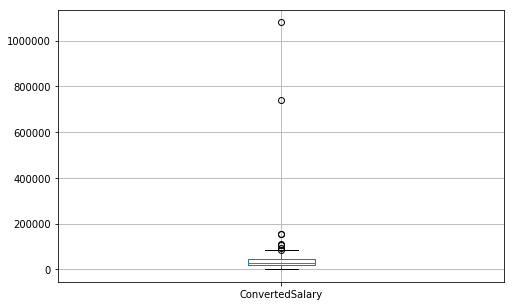

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
China_data.boxplot(column='ConvertedSalary', ax=ax)
plt.show()

In [55]:
s=China_data['ConvertedSalary']
print(s.describe())

count    2.360000e+02
mean     4.081244e+04
std      8.513680e+04
min      4.000000e+00
25%      1.869600e+04
50%      2.805600e+04
75%      4.488000e+04
max      1.080000e+06
Name: ConvertedSalary, dtype: float64


In [56]:
China_data_copy=China_data.copy()
China_data_copy.loc[:, 'isOutlier'] = (s < s.quantile(0.25))|(s > s.quantile(0.75))
#China_data_copy.loc[:, 'isOutlier'] = s > s.quantile(0.75)
China_data = China_data_copy[China_data_copy['isOutlier'] != True]
print(China_data['ConvertedSalary'].describe())

count      132.000000
mean     28249.765152
std       7522.717476
min      18696.000000
25%      22092.500000
50%      28053.000000
75%      33660.000000
max      44880.000000
Name: ConvertedSalary, dtype: float64


In [57]:
China_data['SalaryType']=None
China_data.loc[China_data.ConvertedSalary<=22000,'SalaryType'] = 'Low'
China_data.loc[China_data.ConvertedSalary>=33000,'SalaryType'] = 'High'
China_data.loc[(China_data.ConvertedSalary>22000) & (China_data.ConvertedSalary<33000),'SalaryType'] = 'Medium'

China_data.shape

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zhehaoguo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(132, 9)

In [58]:
China_data_DevType = China_data
print(China_data_DevType.dtypes)
China_data_DevType = China_data_DevType.dropna(subset=['DevType'])
# DevType=India_data_DevType['DevType']
#India_data_DevType['DevType'].dropna()
# DevType.astype(str)
China_data_DevType['DevType'].astype(str)
print(China_data_DevType['DevType'].dtypes)

Country                object
FormalEducation        object
OpenSource             object
DevType                object
YearsCodingProf        object
LanguageWorkedWith     object
ConvertedSalary       float64
isOutlier                bool
SalaryType             object
dtype: object
object


In [59]:
China_data_DevType=China_data_DevType.drop('DevType', axis=1).join(China_data_DevType['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

In [60]:
China_data_DevType['Type']=None
China_data_DevType.loc[(China_data_DevType.DevType=='Back-end developer')|(China_data_DevType.DevType=='Full-stack developer')|(China_data_DevType.DevType=='Front-end developer')|(China_data_DevType.DevType=='Mobile developer')|(China_data_DevType.DevType=='Desktop or enterprise applications developer')|(China_data_DevType.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
China_data_DevType.loc[(China_data_DevType.DevType=='Database administrator')|(China_data_DevType.DevType=='DevOps specialist')|(China_data_DevType.DevType=='System administrator'),'Type'] = 'Systems'
China_data_DevType.loc[(China_data_DevType.DevType=='Game or graphics developer')|(China_data_DevType.DevType=='Designer'),'Type'] = 'Design'
China_data_DevType.loc[(China_data_DevType.DevType=='Student')|(China_data_DevType.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
China_data_DevType.loc[(China_data_DevType.DevType=='Data scientist or machine learning specialist')|(China_data_DevType.DevType=='Data or business analyst'),'Type'] = 'DataScience'
China_data_DevType.loc[(China_data_DevType.DevType=='QA or test developer'),'Type'] = 'Testing'
China_data_DevType.loc[(China_data_DevType.DevType=='Marketing or sales professional')|(China_data_DevType.DevType=='C-suite executive (CEO, CTO, etc.)')|(China_data_DevType.DevType=='Product manager')|(China_data_DevType.DevType=='Engineering manager'),'Type'] = 'Management'
China_data_DevType

,Country,FormalEducation,OpenSource,YearsCodingProf,LanguageWorkedWith,ConvertedSalary,isOutlier,SalaryType,DevType,Type
65,China,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,0-2 years,C#;Python,19500.0,False,Low,Back-end developer,Technical
65,China,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,0-2 years,C#;Python,19500.0,False,Low,Database administrator,Systems
65,China,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,0-2 years,C#;Python,19500.0,False,Low,Front-end developer,Technical
720,China,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,3-5 years,C#;Java;JavaScript;Matlab;Python;SQL;HTML;CSS,27120.0,False,Medium,Data or business analyst,DataScience
720,China,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,3-5 years,C#;Java;JavaScript;Matlab;Python;SQL;HTML;CSS,27120.0,False,Medium,Desktop or enterprise applications developer,Technical
...,...,...,...,...,...,...,...,...,...,...
76961,China,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,6-8 years,C;JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,28056.0,False,Medium,Full-stack developer,Technical
77687,China,"Bachelor’s degree (BA, BS, B.Eng., etc.)",No,0-2 years,C++;JavaScript;Python;SQL;HTML;CSS;Bash/Shell,18696.0,False,Low,Back-end developer,Technical
77687,China,"Bachelor’s degree (BA, BS, B.Eng., etc.)",No,0-2 years,C++;JavaScript;Python;SQL;HTML;CSS;Bash/Shell,18696.0,False,Low,DevOps specialist,Systems
78484,China,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",No,0-2 years,JavaScript;Python;R;Ruby;SQL;VBA;HTML;CSS;Bash...,23375.0,False,Medium,Data or business analyst,DataScience


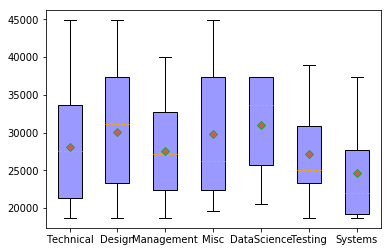

In [61]:
Types = []
devtypes = China_data_DevType.Type.unique()
for devtype in devtypes:
    Types.append(China_data_DevType.loc[China_data_DevType.Type==devtype,'ConvertedSalary'])

# 绘图
plt.boxplot(x = Types, 
            patch_artist=True,
            labels = ['Technical','Design','Management','Misc','DataScience','Testing','Systems'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

# 显示图形
plt.show()

In [62]:
China_data_DevType.groupby(['Type','SalaryType']).median()

ConvertedSalary  isOutlier
Type        SalaryType                            
DataScience High                37404.0      False
            Low                 18696.0      False
            Medium              27120.0      False
Design      High                37404.0      False
            Low                 18700.0      False
            Medium              24936.0      False
Management  High                37400.0      False
            Low                 20568.0      False
            Medium              25728.0      False
Misc        High                37404.0      False
            Low                 18696.0      False
            Medium              26273.5      False
Systems     High                37404.0      False
            Low                 18696.0      False
            Medium              26184.0      False
Technical   High                37404.0      False
            Low                 18696.0      False
            Medium              27120.0      False
Testing     High                40392.0      False
            Low                 19632.0      False
            Medium              23375.0      False

In [63]:
China_dev=China_data_DevType.groupby('Type')

In [64]:
China_dev_technical=China_dev.get_group('Technical') 
China_dev_design=China_dev.get_group('Design') 
China_dev_systems=China_dev.get_group('Systems')
China_dev_datascience=China_dev.get_group('DataScience') 
China_dev_management=China_dev.get_group('Management') 
China_dev_testing=China_dev.get_group('Testing')
China_dev_misc=China_dev.get_group('Misc')

In [65]:
count_technical=China_dev_technical.apply(helper_type)
print(count_technical['SalaryType'])
count_design=China_dev_design.apply(helper_type)
print(count_design['SalaryType'])
count_systems=China_dev_systems.apply(helper_type)
print(count_systems['SalaryType'])
count_datascience=China_dev_datascience.apply(helper_type)
print(count_datascience['SalaryType'])
count_management=China_dev_management.apply(helper_type)
print(count_management['SalaryType'])
count_testing=China_dev_testing.apply(helper_type)
print(count_testing['SalaryType'])
count_misc=China_dev_misc.apply(helper_type)
print(count_misc['SalaryType'])

Counter({'Medium': 87, 'High': 55, 'Low': 48})
Counter({'Medium': 11, 'High': 4, 'Low': 3})
Counter({'High': 18, 'Medium': 13, 'Low': 8})
Counter({'Medium': 15, 'High': 7, 'Low': 7})
Counter({'High': 6, 'Medium': 4, 'Low': 1})
Counter({'Medium': 5, 'High': 3, 'Low': 1})
Counter({'Low': 3, 'Medium': 2, 'High': 1})


In [66]:
html6="""<!DOCTYPE html>
<html>
  <head>
  <style>
#main {
  float: left;
  width: 750px;
}

#sidebar {
  float: right;
  width: 100px;
}

#sequence {
  width: 600px;
  height: 70px;
}

#legend {
  padding: 10px 0 0 3px;
}

#sequence text, #legend text {
  font-weight: 600;
  fill: #fff;
}

#chart {
  position: relative;
}

#chart path {
  stroke: #fff;
}

#explanation {
  position: absolute;
  top: 330px;
  left: 405px;
  width: 120px;
  text-align: center;
  color: #666;
  z-index: -1;
}

#percentage {
  font-size: 2.5em;
}</style>
    <meta charset="utf-8">
    <title>Sequences sunburst</title>
  </head>
  <body>
    <div id="main">
      <div id="sequence"></div>
      <svg id="chart">
        <div id="explanation" style="visibility: hidden;">
          <span id="percentage"></span><br/>
          Respondents
        </div>
      </svg>
    </div>
  </body>
</html>"""

vis1="""DevTypes-Technical-High,69
DevTypes-Technical-Low,37
DevTypes-Technical-Medium,183

DevTypes-Design-High,10
DevTypes-Design-Low,3
DevTypes-Design-Medium,17

DevTypes-Systems-High,18
DevTypes-Systems-Low,8
DevTypes-Systems-Medium,33

DevTypes-DataScience-High,9
DevTypes-DataScience-Low,6
DevTypes-DataScience-Medium,24

DevTypes-Management-High,14
DevTypes-Management-Low,0
DevTypes-Management-Medium,17

DevTypes-Testing-High,5
DevTypes-Testing-Low,1
DevTypes-Testing-Medium,8

DevTypes-Misc-High,1
DevTypes-Misc-Low,2
DevTypes-Misc-Medium,5"""
fout = open("visit-sequences1.csv","w")
fout.write(vis1)

542

In [67]:


js6 = """
 
 require(["d3"], function(d3) {// Dimensions of sunburst. reduce to lower dimensions  
var width = 750;
var height = 600;
var radius = Math.min(width, height) / 2;

// Breadcrumb dimensions: width, height, spacing, width of tip/tail.
var b = {
  w: 150, h: 30, s: 3, t: 10
};

// Mapping of step names to colors.
// Mapping of step names to colors. manually created this 
var colors = {
  "DevTypes" : "#bc99c6",
  "Technical":"#f4c542",
  "Misc": "#5687d1",
  "Design": "#7b615c",
  "Management": "#de783b",
  "Testing": "#6ab975",
  "DataScience": "#a173d1",
  "Systems": "#bbbbb",

  "Backend":"#ef4078",
  "Fullstack": "#5687d1",
  "Frontend": "#7b615c",
  "Mobile": "#de783b",
  "Applications": "#6ab975",
  "EmbeddedApps": "#a173d1",
  "Student": "#bbbbb",

  "Database":"#f4c542",
  "Designer": "#5687d1",
  "SystemAdmin": "#7b615c",
  "DevOps": "#de783b",
  "Analyst": "#6ab975",
  "QA": "#a173d1",
  "DataScientist": "#bbbbb",

  "Engineering":"#f4c542",
  "Product": "#5687d1",
  "Graphics": "#7b615c",
  "Researcher": "#de783b",
  "Analyst": "#6ab975",
  "Csuite": "#a173d1",
  "MarketingSales": "#bbbbb",
  
  "High":"#f4c542",
  "Low": "#5687d1",
  "Medium": "#7b615c",
    
};

// Total size of all segments; we set this later, after loading the data.
var totalSize = 0; 

var vis1 = d3.select("#chart")
    .attr("width", width)
    .attr("height", height)
    .append("svg:g")
    .attr("id", "container")
    .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")");

var partition = d3.partition()
    .size([2 * Math.PI, radius * radius]);

var arc = d3.arc()
    .startAngle(function(d) { return d.x0; })
    .endAngle(function(d) { return d.x1; })
    .innerRadius(function(d) { return Math.sqrt(d.y0); })
    .outerRadius(function(d) { return Math.sqrt(d.y1); });

d3.text("visit-sequences1.csv", function(text) {
  var csv = d3.csvParseRows(text);
  var json = buildHierarchy(csv);
  createVisualization(json);
});

// Main function to draw and set up the visualization, once we have the data.
function createVisualization(json) {

  // Basic setup of page elements.
  initializeBreadcrumbTrail();
  //drawLegend();
  //d3.select("#togglelegend").on("click", toggleLegend);

  // Bounding circle underneath the sunburst, to make it easier to detect
  // when the mouse leaves the parent g.
  vis1.append("svg:circle")
      .attr("r", radius)
      .style("opacity", 0);

  // Turn the data into a d3 hierarchy and calculate the sums.
  var root = d3.hierarchy(json)
      .sum(function(d) { return d.size; })
      .sort(function(a, b) { return b.value - a.value; });
  
  // For efficiency, filter nodes to keep only those large enough to see.
  var nodes = partition(root).descendants()
      .filter(function(d) {
          return (d.x1 - d.x0 > 0.005); // 0.005 radians = 0.29 degrees
      });

  var path = vis1.data([json]).selectAll("path")
      .data(nodes)
      .enter().append("svg:path")
      .attr("display", function(d) { return d.depth ? null : "none"; })
      .attr("d", arc)
      .attr("fill-rule", "evenodd")
      .style("fill", function(d) { return colors[d.data.name]; })
      .style("opacity", 1)
      .on("mouseover", mouseover);

  // Add the mouseleave handler to the bounding circle.
  d3.select("#container").on("mouseleave", mouseleave);

  // Get total size of the tree = value of root node from partition.
  totalSize = path.datum().value;
 };

// Fade all but the current sequence, and show it in the breadcrumb trail.
function mouseover(d) {

  var percentage = (100 * d.value / totalSize).toPrecision(3);
  var percentageString = percentage + "%";
  if (percentage < 0.1) {
    percentageString = "< 0.1%";
  }

  d3.select("#percentage")
      .text(percentageString);

  d3.select("#explanation")
      .style("visibility", "");

  var sequenceArray = d.ancestors().reverse();
  sequenceArray.shift(); // remove root node from the array
  updateBreadcrumbs(sequenceArray, percentageString);

  // Fade all the segments.
  d3.selectAll("path")
      .style("opacity", 0.3);

  // Then highlight only those that are an ancestor of the current segment.
  vis1.selectAll("path")
      .filter(function(node) {
                return (sequenceArray.indexOf(node) >= 0);
              })
      .style("opacity", 1);
}

// Restore everything to full opacity when moving off the visualization.
function mouseleave(d) {

  // Hide the breadcrumb trail
  d3.select("#trail")
      .style("visibility", "hidden");

  // Deactivate all segments during transition.
  d3.selectAll("path").on("mouseover", null);

  // Transition each segment to full opacity and then reactivate it.
  d3.selectAll("path")
      .transition()
      .duration(1000)
      .style("opacity", 1)
      .on("end", function() {
              d3.select(this).on("mouseover", mouseover);
            });

  d3.select("#explanation")
      .style("visibility", "hidden");
}

function initializeBreadcrumbTrail() {
  // Add the svg area.
  var trail = d3.select("#sequence").append("svg:svg")
      .attr("width", width)
      .attr("height", 50)
      .attr("id", "trail");
// Avoid the conflict with the other graphs
// Removing this part - Add the label at the end, for the percentage.
 // trail.append("svg:text")
   // .attr("id", "endlabel")
    //.style("fill", "#000");
}

// Generate a string that describes the points of a breadcrumb polygon.
function breadcrumbPoints(d, i) {
  var points = [];
  points.push("0,0");
  points.push(b.w + ",0");
  points.push(b.w + b.t + "," + (b.h / 2));
  points.push(b.w + "," + b.h);
  points.push("0," + b.h);
  if (i > 0) { // Leftmost breadcrumb; don't include 6th vertex.
    points.push(b.t + "," + (b.h / 2));
  }
  return points.join(" ");
}

// Update the breadcrumb trail to show the current sequence and percentage.
function updateBreadcrumbs(nodeArray, percentageString) {

  // Data join; key function combines name and depth (= position in sequence).
  var trail = d3.select("#trail")
      .selectAll("g")
      .data(nodeArray, function(d) { return d.data.name + d.depth; });

  // Remove exiting nodes.
  trail.exit().remove();

  // Add breadcrumb and label for entering nodes.
  var entering = trail.enter().append("svg:g");

  entering.append("svg:polygon")
      .attr("points", breadcrumbPoints)
      .style("fill", function(d) { return colors[d.data.name]; });

  entering.append("svg:text")
      .attr("x", (b.w + b.t) / 2)
      .attr("y", b.h / 2)
      .attr("dy", "0.35em")
      .attr("text-anchor", "middle")
      .text(function(d) { return d.data.name; });

  // Merge enter and update selections; set position for all nodes.
  entering.merge(trail).attr("transform", function(d, i) {
    return "translate(" + i * (b.w + b.s) + ", 0)";
  });

  // Now move and update the percentage at the end.
  d3.select("#trail").select("#endlabel")
      .attr("x", (nodeArray.length + 0.5) * (b.w + b.s))
      .attr("y", b.h / 2)
      .attr("dy", "0.35em")
      .attr("text-anchor", "middle")
      .text(percentageString);

  // Make the breadcrumb trail visible, if it's hidden.
  d3.select("#trail")
      .style("visibility", "");

}


function buildHierarchy(csv) {
  var root = {"name": "root", "children": []};
  for (var i = 0; i < csv.length; i++) {
    var sequence = csv[i][0];
    var size = +csv[i][1];
    if (isNaN(size)) { // e.g. if this is a header row
      continue;
    }
    var parts = sequence.split("-");
    var currentNode = root;
    for (var j = 0; j < parts.length; j++) {
      var children = currentNode["children"];
      var nodeName = parts[j];
      var childNode;
      if (j + 1 < parts.length) {
   // Not yet at the end of the sequence; move down the tree.
  var foundChild = false;
  for (var k = 0; k < children.length; k++) {
    if (children[k]["name"] == nodeName) {
      childNode = children[k];
      foundChild = true;
      break;
    }
  }
  if (!foundChild) {
    childNode = {"name": nodeName, "children": []};
    children.push(childNode);
  }
  currentNode = childNode;
      } else {
  childNode = {"name": nodeName, "size": size};
  children.push(childNode);
      }
    }
  }
  return root;
};

 });"""

h2 = display(HTML(html6))
j2 = IPython.display.Javascript(js6)
IPython.display.display_javascript(j2)

## North America

In [ ]:
NorthAmerica = public[(public['Country']=='United States') | (public['Country']=='Canada')]
print(NorthAmerica)

In [ ]:
print(NorthAmerica.shape)

In [ ]:
NorthAmerica_data=NorthAmerica[['Country','FormalEducation','OpenSource','DevType','YearsCodingProf','LanguageWorkedWith','ConvertedSalary']]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
NorthAmerica_data.boxplot(column='ConvertedSalary', ax=ax)
plt.show()

In [ ]:
s=NorthAmerica_data['ConvertedSalary']
print(s.describe())

In [ ]:
NorthAmerica_data_copy=NorthAmerica_data.copy()
NorthAmerica_data_copy.loc[:, 'isOutlier'] = (s < s.quantile(0.25))|(s > s.quantile(0.75))
#NorthAmerica_data_copy.loc[:, 'isOutlier'] = s > s.quantile(0.75)
NorthAmerica_data = NorthAmerica_data_copy[NorthAmerica_data_copy['isOutlier'] != True]
print(NorthAmerica_data['ConvertedSalary'].describe())

In [ ]:
NorthAmerica_data['SalaryType']=None
NorthAmerica_data.loc[NorthAmerica_data.ConvertedSalary<=70000,'SalaryType'] = 'Low'
NorthAmerica_data.loc[NorthAmerica_data.ConvertedSalary>=100000,'SalaryType'] = 'High'
NorthAmerica_data.loc[(NorthAmerica_data.ConvertedSalary>70000) & (NorthAmerica_data.ConvertedSalary<100000),'SalaryType'] = 'Medium'

NorthAmerica_data.shape

In [ ]:
NorthAmerica_data_DevType = NorthAmerica_data
print(NorthAmerica_data_DevType.dtypes)
NorthAmerica_data_DevType = NorthAmerica_data_DevType.dropna(subset=['DevType'])
# DevType=India_data_DevType['DevType']
#India_data_DevType['DevType'].dropna()
# DevType.astype(str)
NorthAmerica_data_DevType['DevType'].astype(str)
print(NorthAmerica_data_DevType['DevType'].dtypes)

In [ ]:
NorthAmerica_data_DevType=NorthAmerica_data_DevType.drop('DevType', axis=1).join(NorthAmerica_data_DevType['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

In [ ]:
NorthAmerica_data_DevType['Type']=None
NorthAmerica_data_DevType.loc[(NorthAmerica_data_DevType.DevType=='Back-end developer')|(NorthAmerica_data_DevType.DevType=='Full-stack developer')|(NorthAmerica_data_DevType.DevType=='Front-end developer')|(NorthAmerica_data_DevType.DevType=='Mobile developer')|(NorthAmerica_data_DevType.DevType=='Desktop or enterprise applications developer')|(NorthAmerica_data_DevType.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
NorthAmerica_data_DevType.loc[(NorthAmerica_data_DevType.DevType=='Database administrator')|(NorthAmerica_data_DevType.DevType=='DevOps specialist')|(NorthAmerica_data_DevType.DevType=='System administrator'),'Type'] = 'Systems'
NorthAmerica_data_DevType.loc[(NorthAmerica_data_DevType.DevType=='Game or graphics developer')|(NorthAmerica_data_DevType.DevType=='Designer'),'Type'] = 'Design'
NorthAmerica_data_DevType.loc[(NorthAmerica_data_DevType.DevType=='Student')|(NorthAmerica_data_DevType.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
NorthAmerica_data_DevType.loc[(NorthAmerica_data_DevType.DevType=='Data scientist or machine learning specialist')|(NorthAmerica_data_DevType.DevType=='Data or business analyst'),'Type'] = 'DataScience'
NorthAmerica_data_DevType.loc[(NorthAmerica_data_DevType.DevType=='QA or test developer'),'Type'] = 'Testing'
NorthAmerica_data_DevType.loc[(NorthAmerica_data_DevType.DevType=='Marketing or sales professional')|(NorthAmerica_data_DevType.DevType=='C-suite executive (CEO, CTO, etc.)')|(NorthAmerica_data_DevType.DevType=='Product manager')|(NorthAmerica_data_DevType.DevType=='Engineering manager'),'Type'] = 'Management'
NorthAmerica_data_DevType

In [ ]:
Types = []
devtypes = NorthAmerica_data_DevType.Type.unique()
for devtype in devtypes:
    Types.append(NorthAmerica_data_DevType.loc[NorthAmerica_data_DevType.Type==devtype,'ConvertedSalary'])

# 绘图
plt.boxplot(x = Types, 
            patch_artist=True,
            labels = ['Technical','Design','Management','Misc','DataScience','Testing','Systems'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

# 显示图形
plt.show()

In [ ]:
NorthAmerica_data_DevType.groupby(['Type','SalaryType']).median()

In [ ]:
NorthAmerica_dev=NorthAmerica_data_DevType.groupby('Type')
NorthAmerica_dev_technical=NorthAmerica_dev.get_group('Technical') 
NorthAmerica_dev_design=NorthAmerica_dev.get_group('Design') 
NorthAmerica_dev_systems=NorthAmerica_dev.get_group('Systems')
NorthAmerica_dev_datascience=NorthAmerica_dev.get_group('DataScience') 
NorthAmerica_dev_management=NorthAmerica_dev.get_group('Management') 
NorthAmerica_dev_testing=NorthAmerica_dev.get_group('Testing')
NorthAmerica_dev_misc=NorthAmerica_dev.get_group('Misc')

In [ ]:
count_technical=NorthAmerica_dev_technical.apply(helper_type)
print(count_technical['SalaryType'])
count_design=NorthAmerica_dev_design.apply(helper_type)
print(count_design['SalaryType'])
count_systems=NorthAmerica_dev_systems.apply(helper_type)
print(count_systems['SalaryType'])
count_datascience=NorthAmerica_dev_datascience.apply(helper_type)
print(count_datascience['SalaryType'])
count_management=NorthAmerica_dev_management.apply(helper_type)
print(count_management['SalaryType'])
count_testing=NorthAmerica_dev_testing.apply(helper_type)
print(count_testing['SalaryType'])
count_misc=NorthAmerica_dev_misc.apply(helper_type)
print(count_misc['SalaryType'])

## Europe

In [ ]:
Europe = public[(public['CurrencySymbol']=='GBP') | (public['CurrencySymbol']=='EUR')]
print(Europe)

In [ ]:
print(Europe.shape)

In [ ]:
Europe_data=Europe[['Country','FormalEducation','OpenSource','DevType','YearsCodingProf','LanguageWorkedWith','ConvertedSalary']]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
Europe_data.boxplot(column='ConvertedSalary', ax=ax)
plt.show()

In [ ]:
s=Europe_data['ConvertedSalary']
print(s.describe())

In [ ]:
Europe_data_copy=Europe_data.copy()
Europe_data_copy.loc[:, 'isOutlier'] = (s < s.quantile(0.25))|(s > s.quantile(0.75))
#NorthAmerica_data_copy.loc[:, 'isOutlier'] = s > s.quantile(0.75)
Europe_data = Europe_data_copy[Europe_data_copy['isOutlier'] != True]
print(Europe_data['ConvertedSalary'].describe())

In [ ]:
Europe_data['SalaryType']=None
Europe_data.loc[Europe_data.ConvertedSalary<=45000,'SalaryType'] = 'Low'
Europe_data.loc[Europe_data.ConvertedSalary>=60000,'SalaryType'] = 'High'
Europe_data.loc[(Europe_data.ConvertedSalary>45000) & (Europe_data.ConvertedSalary<60000),'SalaryType'] = 'Medium'

Europe_data.shape

In [ ]:
Europe_data_DevType = Europe_data
print(Europe_data_DevType.dtypes)
Europe_data_DevType = Europe_data_DevType.dropna(subset=['DevType'])
# DevType=India_data_DevType['DevType']
#India_data_DevType['DevType'].dropna()
# DevType.astype(str)
Europe_data_DevType['DevType'].astype(str)
print(Europe_data_DevType['DevType'].dtypes)

In [ ]:
Europe_data_DevType=Europe_data_DevType.drop('DevType', axis=1).join(Europe_data_DevType['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('DevType'))

In [ ]:
Europe_data_DevType['Type']=None
Europe_data_DevType.loc[(Europe_data_DevType.DevType=='Back-end developer')|(Europe_data_DevType.DevType=='Full-stack developer')|(Europe_data_DevType.DevType=='Front-end developer')|(Europe_data_DevType.DevType=='Mobile developer')|(Europe_data_DevType.DevType=='Desktop or enterprise applications developer')|(Europe_data_DevType.DevType=='Embedded applications or devices developer'),'Type'] = 'Technical'
Europe_data_DevType.loc[(Europe_data_DevType.DevType=='Database administrator')|(Europe_data_DevType.DevType=='DevOps specialist')|(Europe_data_DevType.DevType=='System administrator'),'Type'] = 'Systems'
Europe_data_DevType.loc[(Europe_data_DevType.DevType=='Game or graphics developer')|(Europe_data_DevType.DevType=='Designer'),'Type'] = 'Design'
Europe_data_DevType.loc[(Europe_data_DevType.DevType=='Student')|(Europe_data_DevType.DevType=='Educator or academic researcher'),'Type'] = 'Misc'
Europe_data_DevType.loc[(Europe_data_DevType.DevType=='Data scientist or machine learning specialist')|(Europe_data_DevType.DevType=='Data or business analyst'),'Type'] = 'DataScience'
Europe_data_DevType.loc[(Europe_data_DevType.DevType=='QA or test developer'),'Type'] = 'Testing'
Europe_data_DevType.loc[(Europe_data_DevType.DevType=='Marketing or sales professional')|(Europe_data_DevType.DevType=='C-suite executive (CEO, CTO, etc.)')|(Europe_data_DevType.DevType=='Product manager')|(Europe_data_DevType.DevType=='Engineering manager'),'Type'] = 'Management'
Europe_data_DevType

In [ ]:
Types = []
devtypes = Europe_data_DevType.Type.unique()
for devtype in devtypes:
    Types.append(Europe_data_DevType.loc[Europe_data_DevType.Type==devtype,'ConvertedSalary'])

# 绘图
plt.boxplot(x = Types, 
            patch_artist=True,
            labels = ['Technical','Design','Management','Misc','DataScience','Testing','Systems'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

# 显示图形
plt.show()

In [ ]:
Europe_data_DevType.groupby(['Type','SalaryType']).median()

In [ ]:
Europe_dev=Europe_data_DevType.groupby('Type')
Europe_dev_technical=Europe_dev.get_group('Technical') 
Europe_dev_design=Europe_dev.get_group('Design') 
Europe_dev_systems=Europe_dev.get_group('Systems')
Europe_dev_datascience=Europe_dev.get_group('DataScience') 
Europe_dev_management=Europe_dev.get_group('Management') 
Europe_dev_testing=Europe_dev.get_group('Testing')
Europe_dev_misc=Europe_dev.get_group('Misc')

In [ ]:
count_technical=Europe_dev_technical.apply(helper_type)
print(count_technical['SalaryType'])
count_design=Europe_dev_design.apply(helper_type)
print(count_design['SalaryType'])
count_systems=Europe_dev_systems.apply(helper_type)
print(count_systems['SalaryType'])
count_datascience=Europe_dev_datascience.apply(helper_type)
print(count_datascience['SalaryType'])
count_management=Europe_dev_management.apply(helper_type)
print(count_management['SalaryType'])
count_testing=Europe_dev_testing.apply(helper_type)
print(count_testing['SalaryType'])
count_misc=Europe_dev_misc.apply(helper_type)
print(count_misc['SalaryType'])